In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
from scipy import stats

In [3]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [4]:
datestring = ['201501', '201508']
for date in datestring:
    getCitiBikeCSV(date)

file in place, you can continue
file in place, you can continue


In [23]:
winter = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring[0] + '-citibike-tripdata.csv')
summer = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring[1] + '-citibike-tripdata.csv')

In [24]:
winter['season'] = 1
summer['season'] = 0

In [29]:
winter['date'] = pd.to_datetime(df['starttime'])
summer['date'] = pd.to_datetime(df['starttime'])

In [ ]:
frames = [winter, summer]
df = pd.concat(frames)

In [36]:
df = df.dropna(subset=['birth year'])

In [38]:
df['age'] = 2015 - df['birth year']

C:\Users\sucre\Anaconda3\envs\udsal\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,season,date,age
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960,2,1,2015-01-01 00:01:00,55
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963,1,1,2015-01-01 00:02:00,52
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974,1,1,2015-01-01 00:04:00,41
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969,1,1,2015-01-01 00:04:00,46
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977,1,1,2015-01-01 00:05:00,38


In [53]:
df['ey'] = 0
df['ey'][df.age >= 65] = 1
df['ey'][df.age < 65] = 0

C:\Users\sucre\Anaconda3\envs\udsal\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sucre\Anaconda3\envs\udsal\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sucre\Anaconda3\envs\udsal\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.

In [54]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,season,date,age,ey
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960,2,1,2015-01-01 00:01:00,55,0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963,1,1,2015-01-01 00:02:00,52,0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974,1,1,2015-01-01 00:04:00,41,0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969,1,1,2015-01-01 00:04:00,46,0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977,1,1,2015-01-01 00:05:00,38,0
5,496,1/1/2015 0:07,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,-74.000271,20788,Subscriber,1969,2,1,2015-01-01 00:07:00,46,0
6,152,1/1/2015 0:07,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,-73.986831,19006,Subscriber,1972,1,1,2015-01-01 00:07:00,43,0
7,1183,1/1/2015 0:08,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,-73.977387,17640,Subscriber,1985,2,1,2015-01-01 00:08:00,30,0
8,846,1/1/2015 0:09,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,-73.993722,15691,Subscriber,1991,1,1,2015-01-01 00:09:00,24,0
9,576,1/1/2015 0:10,1/1/2015 0:20,160,E 37 St & Lexington Ave,40.748238,-73.978311,174,E 25 St & 1 Ave,40.738177,-73.977387,17837,Subscriber,1991,1,1,2015-01-01 00:10:00,24,0


In [ ]:
data.groupby(['date','type']).count()['amount'].plot(ax=ax)

In [76]:
df.groupby(['season','ey']).count()

tripduration  starttime  stoptime  start station id  \
season ey                                                        
0      0         942391     942391    942391            942391   
       1          15652      15652     15652             15652   
1      0         274085     274085    274085            274085   
       1           5839       5839      5839              5839   

           start station name  start station latitude  \
season ey                                               
0      0               942391                  942391   
       1                15652                   15652   
1      0               274085                  274085   
       1                 5839                    5839   

           start station longitude  end station id  end station name  \
season ey                                                              
0      0                    942391          942391            942391   
       1                     15652           15652             15652   
1      0                    274085          274085            274085   
       1                      5839            5839              5839   

           end station latitude  end station longitude  bikeid  usertype  \
season ey                                                                  
0      0                 942391                 942391  942391    942391   
       1                  15652                  15652   15652     15652   
1      0                 274085                 274085  274085    274085   
       1                   5839                   5839    5839      5839   

           birth year  gender    date     age  
season ey                                      
0      0       942391  942391  942391  942391  
       1        15652   15652   15652   15652  
1      0       274085  274085  274085  274085  
       1         5839    5839    5839    5839

[Text(0,0,'Summer'), Text(0,0,'Winter')]

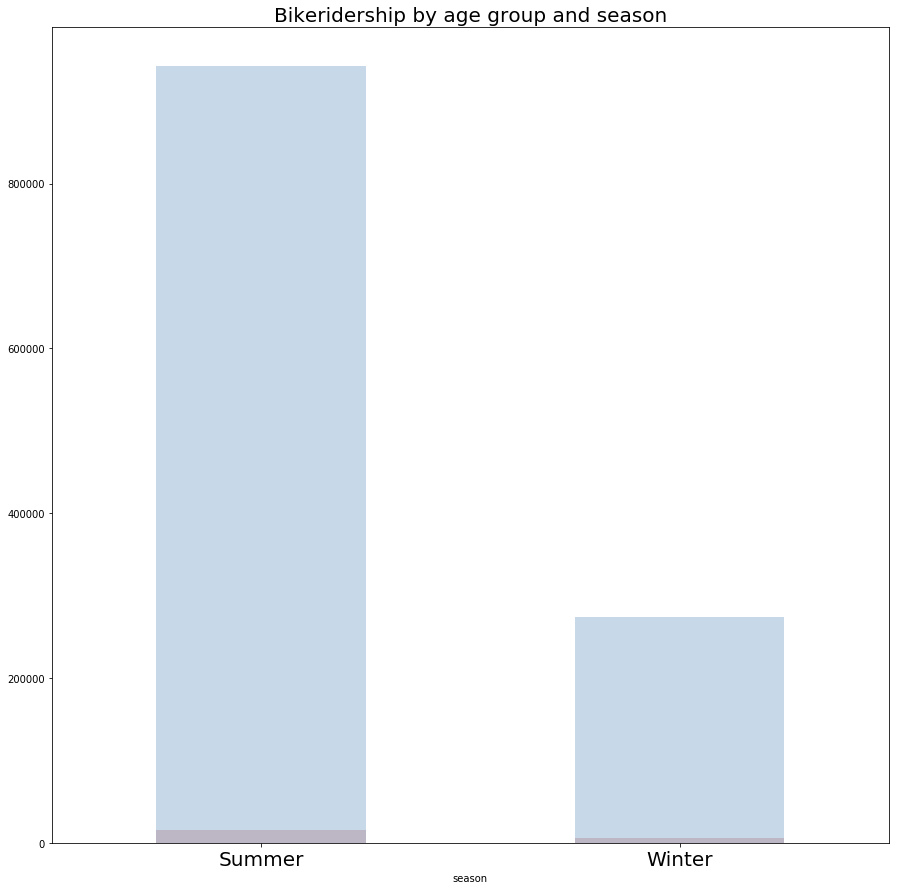

In [117]:
f, ax = plt.subplots(figsize=(15,15))
((df[df['ey']==1].groupby(["season"]).count()['bikeid']) / norm_w).plot(kind="bar", color='IndianRed',label='elder',ax=ax, alpha=0.3)
((df[df['ey']==0].groupby(["season"]).count()['bikeid']) / norm_w).plot(kind="bar", color='SteelBlue',label='young',ax=ax, alpha=0.3)
ax.set_title("Bikeridership by age group and season", fontsize=20)
plt.xticks(rotation=0)
ax.xaxis.set_ticklabels(['Summer', 'Winter'], fontsize=20)

<Figure size 216x288 with 0 Axes>

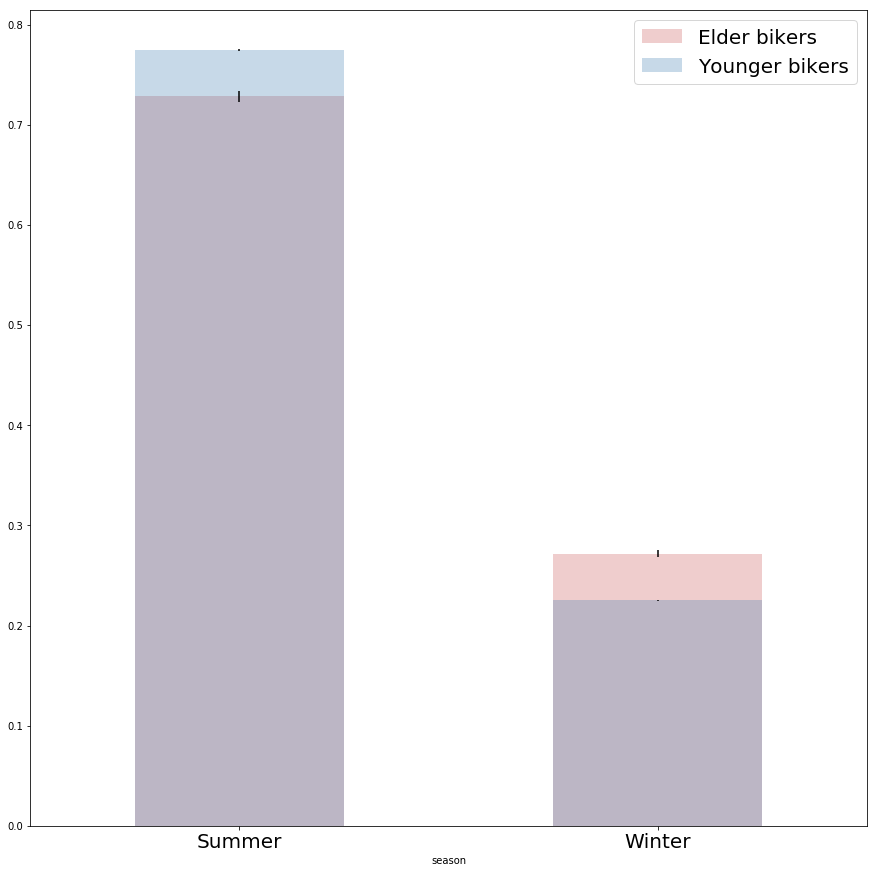

<Figure size 216x288 with 0 Axes>

In [116]:
counts_e = df[df['ey']==1].groupby(["season"]).count()['bikeid']
norm_e = counts_e.sum()
error_e = np.sqrt(counts_e)

counts_y = df[df['ey']==0].groupby(["season"]).count()['bikeid']
norm_y = counts_y.sum()
error_y = np.sqrt(counts_y)



ax = ((counts_e) / norm_e).plot(kind="bar",color='IndianRed',  yerr=[
    ((error_e) / norm_e, (error_e) / norm_e)], label='Elder bikers', alpha=0.3)
((counts_y) / norm_y).plot(kind="bar",color='SteelBlue',  yerr=[
    ((error_y) / norm_y, (error_y) / norm_y)], label='Young bikers', alpha=0.3)
plt.legend(['Elder bikers','Younger bikers'],fontsize=20)
ax.xaxis.set_ticklabels(['Summer', 'Winter'], fontsize=20)
plt.xticks(rotation=0)
plt.figure(figsize=(3,4))

In [118]:
counts_e

season
0    15652
1     5839
Name: bikeid, dtype: int64

In [123]:
winter_e = sum(counts_e[1]) * 1.0 / norm_e  
summer_e = sum(counts_e[0]) * 1.0 / norm_e  
ewinter_e = np.sqrt(sum(error_e[1]**2)) / norm_e 
esummer_e = np.sqrt(sum(error_e[0]**2)) / norm_e

winter_y = sum(counts_y[1]) * 1.0 / norm_y
summer_y = sum(counts_y[0]) * 1.0 / norm_y
ewinter_y = np.sqrt(sum(error_y[1]**2)) / norm_y
esummer_y = np.sqrt(sum(error_y[0]**2)) / norm_y

In [124]:
print("Elder: winter:{0:.3f}, summer:{1:.3f}, winter error:{2:.3f}, summer error:{3:.3f}"\
      .format(winter_e, summer_e, ewinter_e, esummer_e))
print("Young: winter:{0:.3f}, summer:{1:.3f}, winter error:{2:.3f}, summer error:{3:.3f}"\
      .format(winter_y, summer_y, ewinter_y, esummer_y))

Elder: winter:0.272, summer:0.728, winter error:0.004, summer error:0.006
Young: winter:0.225, summer:0.775, winter error:0.000, summer error:0.001


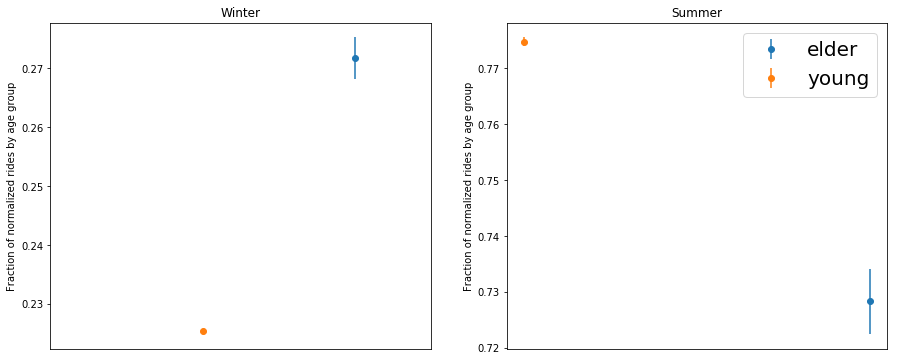

In [128]:
fig = plt.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

ax1.errorbar([0.4], [winter_e], yerr=[ewinter_e], fmt='o', label='elder')
ax1.errorbar([0.2], [winter_y], yerr=[ewinter_y], fmt='o', label='young')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [summer_e], yerr=[esummer_e], fmt='o', label='elder')
ax2.errorbar([0.2], [summer_y], yerr=[esummer_y], fmt='o', label='young')
ax1.set_xlim(0, 0.5)
ax1.set_title("Winter")
ax2.set_title("Summer")
ax2.set_ylabel("Fraction of normalized rides by age group")
ax1.set_ylabel("Fraction of normalized rides by age group")
plt.legend(fontsize = 20)

### Figure 1. The result shows opposite consequence other than hypothesis.

In [133]:
P0mP1 = winter_e - winter_y
print ("difference between elder and young on winter: ", P0mP1)
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between elder and young on winter:  0.04638447677056323
We must check the significance before we reject the Null Hypothesis


In [134]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_ey = se(p(winter_e, winter_y, norm_y, norm_e), norm_y, norm_e)
# print (sp_stdev_mw)
z = zscore(winter_y, winter_e, sp_stdev_ey)
print ("The z statistics is %.2f"%z)

The z statistics is -15.17
